# Time series decomposition of the data cube

In [1]:
using CABLAB

In [2]:
c             = Cube("/Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res/")
vars          = ["air_temperature_2m","soil_moisture","c_emissions"];
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,40),variable=vars); 

CABLAB data cube at /Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res/
Spatial resolution:  1440x720 at 0.25 degrees.
Temporal resolution: 2001-01-01T00:00:00 to 2012-01-01T00:00:00 at 8daily time steps
Variables:           Rg aerosol_optical_thickness_1610 aerosol_optical_thickness_550 aerosol_optical_thickness_555 aerosol_optical_thickness_659 aerosol_optical_thickness_865 air_temperature_2m bare_soil_evaporation black_sky_albedo burnt_area c_emissions country_mask evaporation evaporative_stress fpar_fluxcom fractional_snow_cover gross_primary_productivity interception_loss land_surface_temperature latent_energy net_ecosystem_exchange open_water_evaporation ozone potential_evaporation precipitation root_moisture sensible_heat snow_sublimation snow_water_equivalent soil_moisture surface_moisture terrestrial_ecosystem_respiration transpiration water_mask water_vapour white_sky_albedo 


We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

In [5]:
cube_filled=mapCube(gapFillMSC,cdata);

In [6]:
xout=mapCube(filterTSFFT,cube_filled)

Temporary Data Cube with the following dimensions
Time                Axis with 506 Elements from 2001-01-01T00:00:00 to 2011-12-27T00:00:00
TimeScale           Axis with elements: Trend Long-Term Variability Annual Cycle Fast Oscillations 
Lon                 Axis with 200 Elements from -10.0 to 39.75
Lat                 Axis with 140 Elements from 65.0 to 30.25
Variable            Axis with elements: air_temperature_2m soil_moisture c_emissions 


And we can plot the resulting decomposed time series

In [7]:
plotXY(xout,xaxis=TimeAxis,group="timescale",lon=35,lat=50.5,var=1)

  likely near In[7]:1
  likely near In[7]:1
  likely near In[7]:1
  likely near In[7]:1


In [18]:
variance=reduceCube(var, xout, TimeAxis, no_ocean=true);

Let's look at a map of the variability in the Trend signal to see where trends in air temperature are strongest.

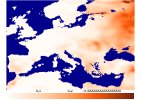

In [19]:
plotMAP(variance,timescale=1,var=1)

One can also check which areas have the strongest variance in the seasonal cycle

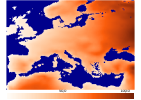

In [20]:
plotMAP(variance,timescale=3,var=1)